In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!pip install kaggle


In [5]:
data=pd.read_csv("globalterrorismdb_0718dist[1].csv", encoding='latin1')
data.head()


<ipython-input-5-abdfbdfa08f8>:1: DtypeWarning: Columns (4,31,33,62,76,79,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("globalterrorismdb_0718dist[1].csv", encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [6]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.887000e+04,18870.000000,18870.000000,18870.000000,18870.000000,18870.000000,18870.000000,18123.000000,1.812300e+04,18870.000000,...,4.330000e+02,1.0,9.000000e+01,1.0,670.000000,510.000000,18869.000000,18869.000000,18869.000000,18869.000000
mean,1.978580e+11,1978.517011,6.198781,15.206465,0.019131,177.541176,5.416428,26.370738,-4.786345e+03,1.289401,...,3.788639e+06,20000.0,1.333696e+06,0.0,2.902985,8.225490,-3.631989,-3.589485,0.249987,-2.612963
std,3.406406e+08,3.409654,3.448318,8.955007,0.136989,166.162416,3.357730,22.515713,6.402079e+05,0.952265,...,4.845468e+07,NaN,4.800603e+06,NaN,1.298898,28.655294,4.529369,4.575088,0.645339,4.518743
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-8.618590e+07,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.977042e+11,1977.000000,3.000000,8.000000,0.000000,69.000000,2.000000,13.692880,-8.688120e+01,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.979101e+11,1979.000000,6.000000,15.000000,0.000000,110.000000,5.000000,33.888523,-6.926293e+00,1.000000,...,0.000000e+00,20000.0,7.750000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.981082e+11,1981.000000,9.000000,23.000000,0.000000,209.000000,8.000000,43.184180,9.174508e+00,1.000000,...,4.350000e+05,20000.0,7.750000e+05,0.0,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.983052e+11,1986.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,1.726362e+02,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,215.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.nunique()

eventid       18870
iyear            15
imonth           13
iday             32
approxdate       19
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related         154
Length: 135, dtype: int64

In [8]:
unique_values = data['country_txt'].unique()
print(unique_values)


['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibia' '

In [9]:
country_names = [
    'Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
    'United States', 'Uruguay', 'Italy', 'East Germany (GDR)', 'Ethiopia',
    'Guatemala', 'Venezuela', 'West Germany (FRG)', 'Switzerland', 'Jordan',
    'Spain', 'Brazil', 'Egypt', 'Argentina', 'Lebanon', 'Ireland', 'Turkey',
    'Paraguay', 'Iran', 'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
    'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan', 'Zambia', 'Sweden',
    'Costa Rica', 'South Yemen', 'Cambodia', 'Israel', 'Poland', 'Taiwan', 'Panama',
    'Kuwait', 'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
    'France', 'South Vietnam', 'Brunei', 'Zaire',
    "People's Republic of the Congo", 'Portugal', 'Algeria', 'El Salvador',
    'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus', 'Myanmar', 'Afghanistan',
    'Peru', 'Chile', 'Honduras', 'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia',
    'Singapore', 'Botswana', 'Jamaica', 'Chad', 'North Yemen', 'Andorra', 'Syria',
    'South Korea', 'United Arab Emirates', 'South Africa', 'Kenya', 'Iraq',
    'Somalia', 'Tanzania', 'Sri Lanka', 'Namibia', 'Bahamas', 'Nigeria', 'Barbados',
    'Trinidad and Tobago', 'Bangladesh', 'Angola', 'Mauritania', 'Saudi Arabia',
    'Djibouti', 'Indonesia', 'Malta', 'Rhodesia', 'Soviet Union', 'Denmark',
    'Western Sahara', 'Guyana', 'Mozambique', 'Tunisia', 'Uganda', 'Norway',
    'Lesotho', 'Gabon', 'Libya', 'Bahrain', 'Hong Kong', 'Senegal', 'Zimbabwe',
    'Guinea', 'Grenada', 'New Hebrides', 'Belize', 'Guadeloupe', 'Martinique',
    'Vatican City', 'Albania', 'Central African Republic', 'Seychelles',
    'Dominica', 'Qatar', 'Bulgaria', 'Suriname', 'Swaziland', 'Luxembourg',
    'Iceland', 'French Guiana', 'Falkland Islands', 'Burkina Faso',
    'New Caledonia', 'Romania', 'Niger', 'Nepal', 'Togo', 'Finland', 'Fiji', 'Ghana',
    'Maldives', 'Mauritius', 'Hungary', 'Laos', 'Papua New Guinea', 'China',
    'Liberia', 'Republic of the Congo', 'Mali', 'Germany', 'Yemen', 'Rwanda',
    'Sierra Leone', 'Cameroon', 'Cuba', 'Croatia', 'Georgia', 'Azerbaijan',
    'Madagascar', 'Lithuania', 'Burundi', 'Ukraine', 'Moldova', 'Armenia', 'Russia',
    'Ivory Coast', 'Kazakhstan', 'Antigua and Barbuda', 'Bosnia-Herzegovina',
    'Equatorial Guinea', 'Tajikistan', 'Malawi', 'Uzbekistan', 'Latvia', 'Estonia',
    'Vietnam', 'Comoros', 'Benin', 'Slovak Republic', 'Macedonia',
    'Wallis and Futuna', 'Belarus', 'Czech Republic', 'Slovenia', 'Gambia',
    'North Korea', 'Eritrea', 'St. Kitts and Nevis', 'French Polynesia', 'Macau',
    'Kyrgyzstan', 'Vanuatu', 'Democratic Republic of the Congo', 'Kosovo',
    'Solomon Islands', 'East Timor', 'St. Lucia', 'Guinea-Bissau', 'Montenegro',
    'International', 'Turkmenistan', 'Serbia-Montenegro', 'Bhutan', 'Serbia',
    'South Sudan']
total_unique_values = len(set(country_names))
print(total_unique_values)

205


In [10]:
unique_values_counts=data['country_txt'].value_counts()
print(unique_values)

['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibia' '

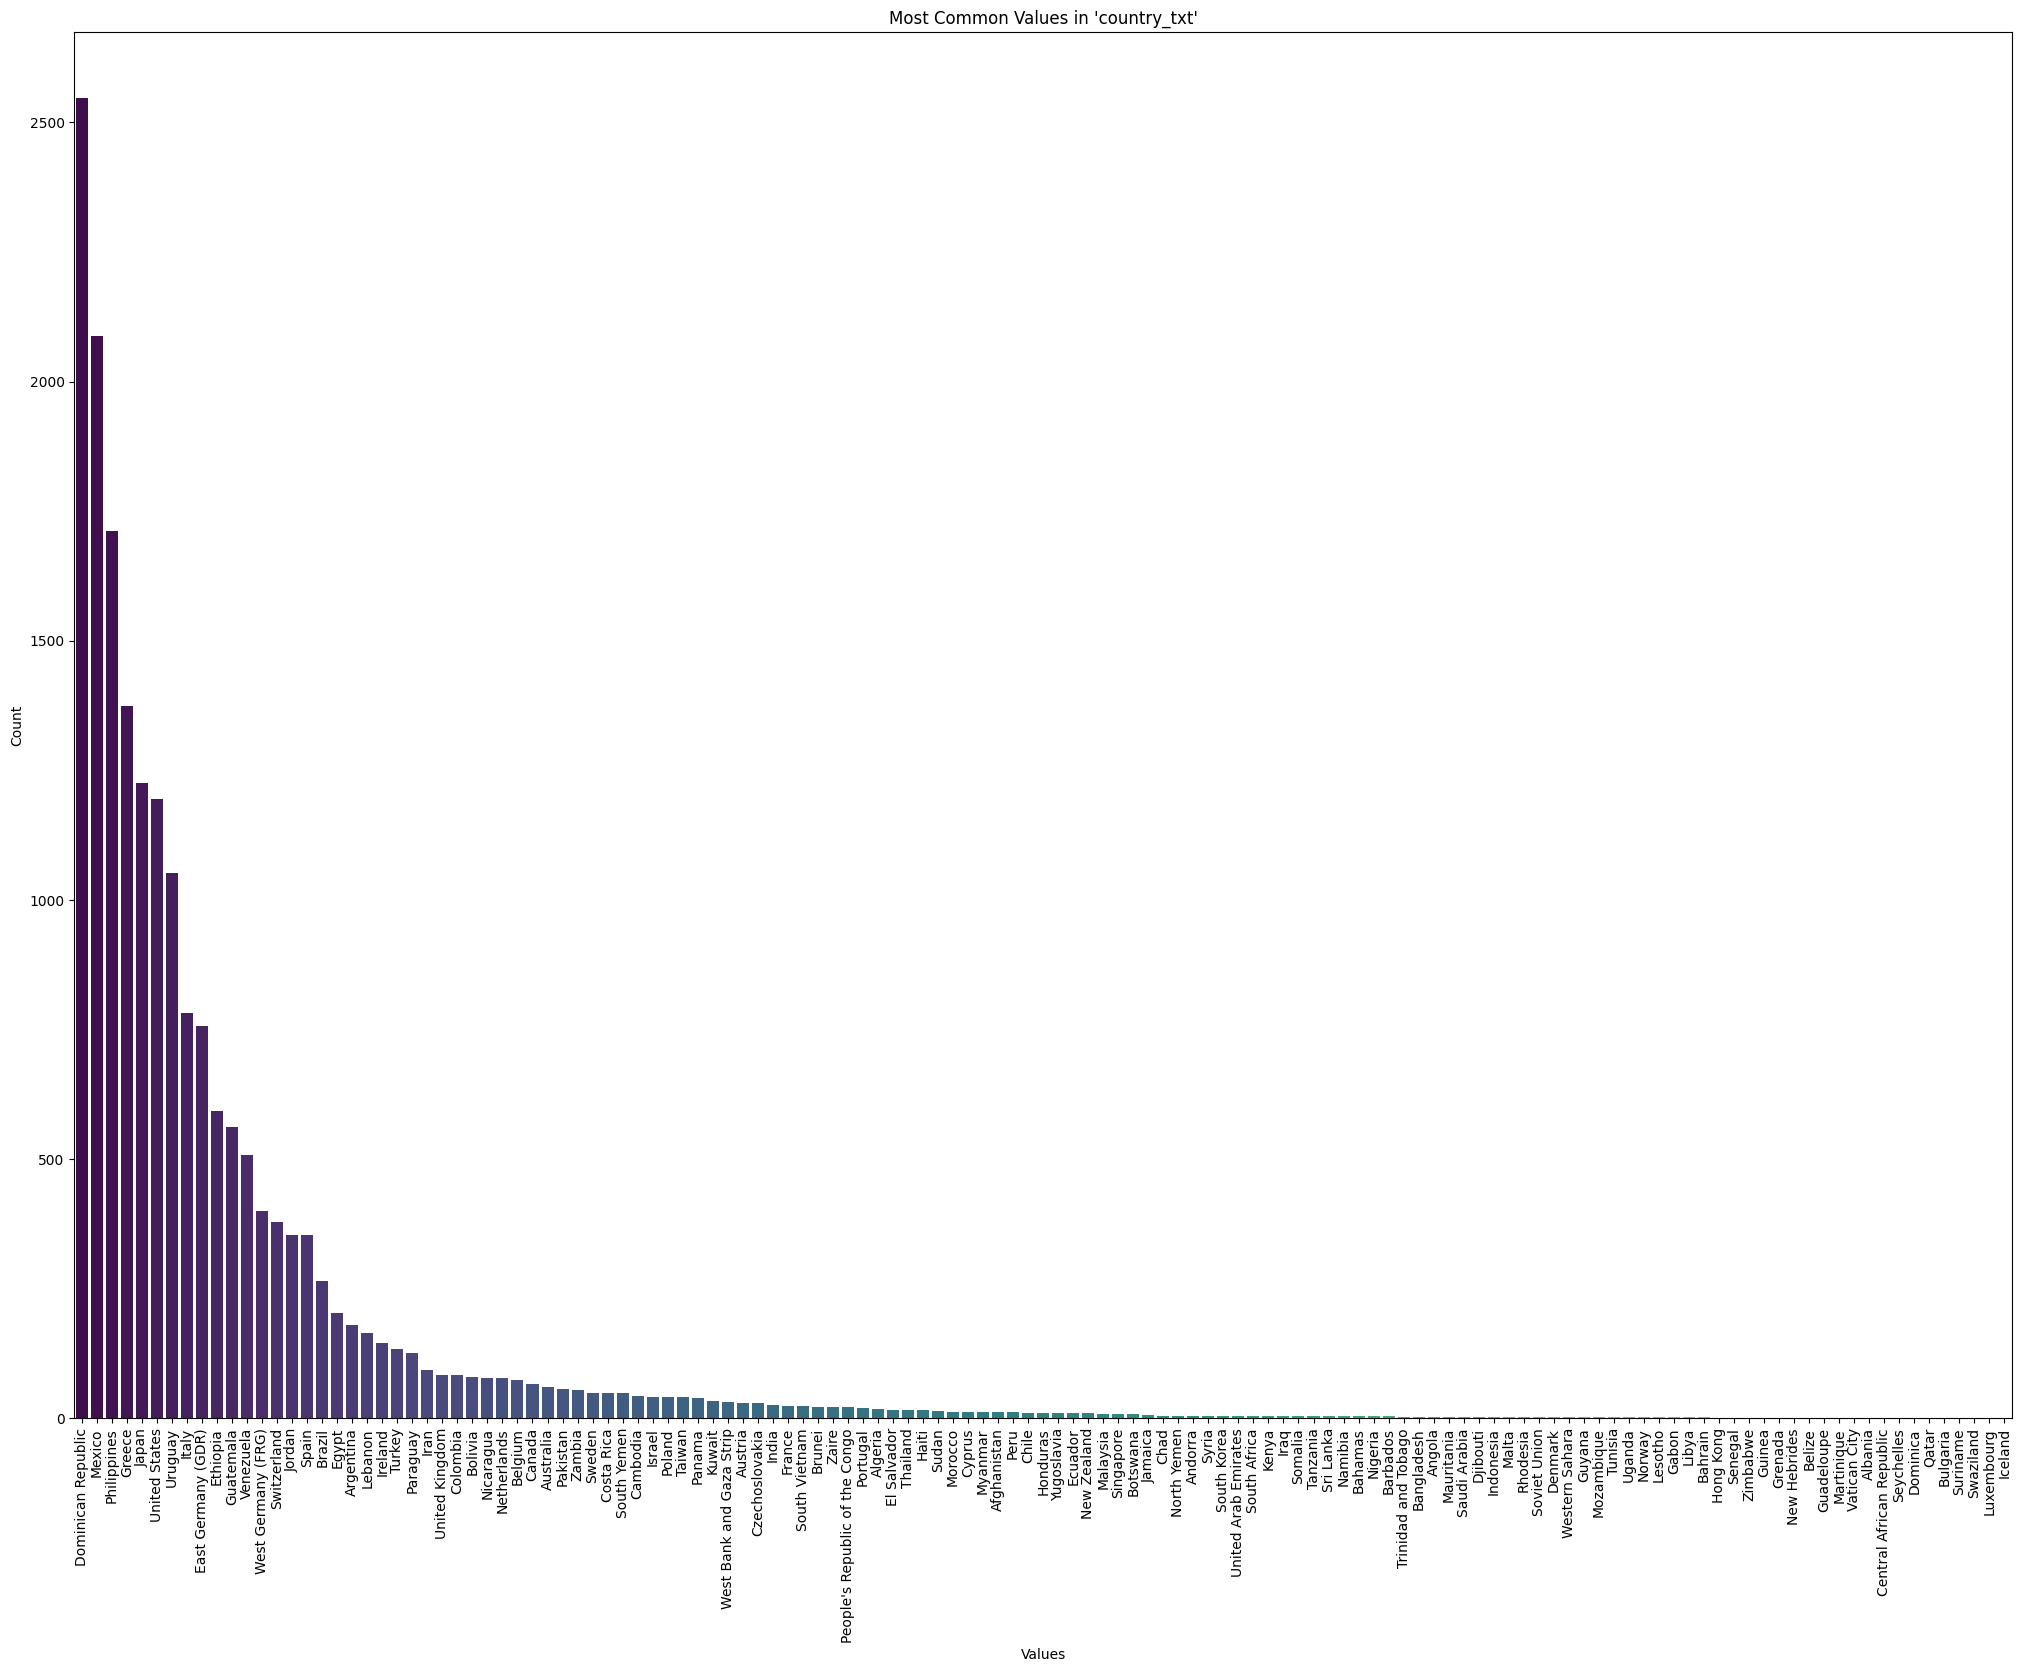

In [50]:
plt.figure(figsize=(25, 18))
sns.barplot(x=unique_values, y=unique_values_counts, palette="viridis")
plt.title("Most Common Values in 'country_txt'")
plt.xlabel("Values")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
#this Barplot show the number of terrorist attatcks in every country, in descending order
#yaxis-terrrorist event, xaxis-countries

In [18]:
columns=data.columns
pd.set_option('display.max_columns', None)
print(data)

            eventid  iyear  imonth  iday approxdate  extended resolution  \
0      197000000001   1970       7     2        NaN         0        NaN   
1      197000000002   1970       0     0        NaN         0        NaN   
2      197001000001   1970       1     0        NaN         0        NaN   
3      197001000002   1970       1     0        NaN         0        NaN   
4      197001000003   1970       1     0        NaN         0        NaN   
...             ...    ...     ...   ...        ...       ...        ...   
18865  198305240006   1983       5    24        NaN         0        NaN   
18866  198305240007   1983       5    24        NaN         0        NaN   
18867  198305240008   1983       5    24        NaN         0        NaN   
18868  198305240009   1983       5    24        NaN         0        NaN   
18869  198305240010   1983       5    24        NaN         0        NaN   

       country         country_txt  region                   region_txt  \
0           

In [53]:
Total_Casualties=data['nkill'].sum()
print('The Total number of Casualties is ', Total_Casualties)

Total_Wounds=data['nwound'].sum()
print('The Total number of Wounds is ', Total_Wounds)

The Total number of Casualties is  25667.0
The Total number of Wounds is  19678.0


In [33]:
sum_by_year = data.groupby('iyear')['nkill'].sum().reset_index()
print(sum_by_year)

    iyear   nkill
0    1970   174.0
1    1971   173.0
2    1972   566.0
3    1973   370.0
4    1974   539.0
5    1975   617.0
6    1976   674.0
7    1977   456.0
8    1978  1459.0
9    1979  2100.0
10   1980  4400.0
11   1981  4851.0
12   1982  5136.0
13   1983  4151.0
14   1986     1.0


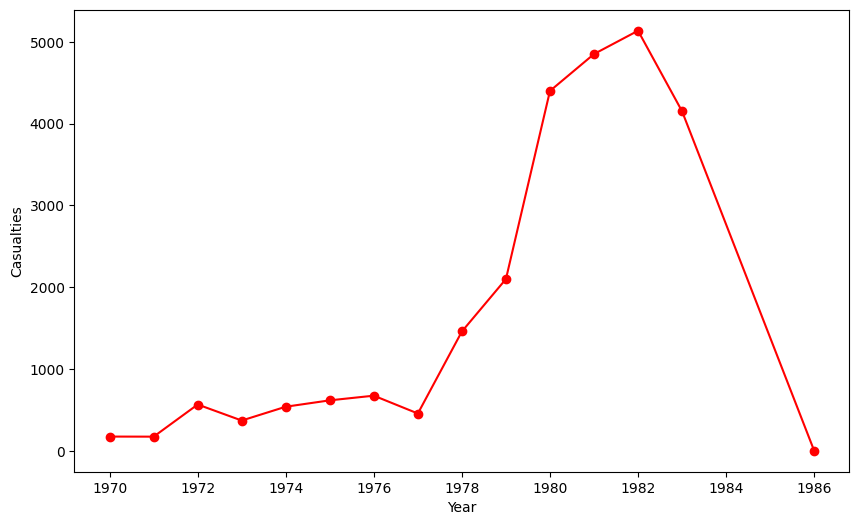

In [52]:
plt.figure(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Casualties')
plt.plot(sum_by_year['iyear'], sum_by_year['nkill'], linestyle='-', marker='o', color='r')
#Casualties data from

In [54]:
#We have Visualized the number of Accumalative Sum of Casualties every year form 1970 to 1986
#We have Visualized the Total Sum of Casualties for every Country in descending order in a barplot